In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

2025-02-02 21:39:24.644132: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-02 21:39:24.651885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738521564.660278  147747 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738521564.663050  147747 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 21:39:24.672708: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

I0000 00:00:1738521567.068645  147747 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13553 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1738521567.657362  150510 service.cc:148] XLA service 0x76a368002af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738521567.657386  150510 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-02-02 21:39:27.661969: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738521567.675683  150510 cuda_dnn.cc:529] Loaded cuDNN version 90700


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


I0000 00:00:1738521567.954014  150510 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

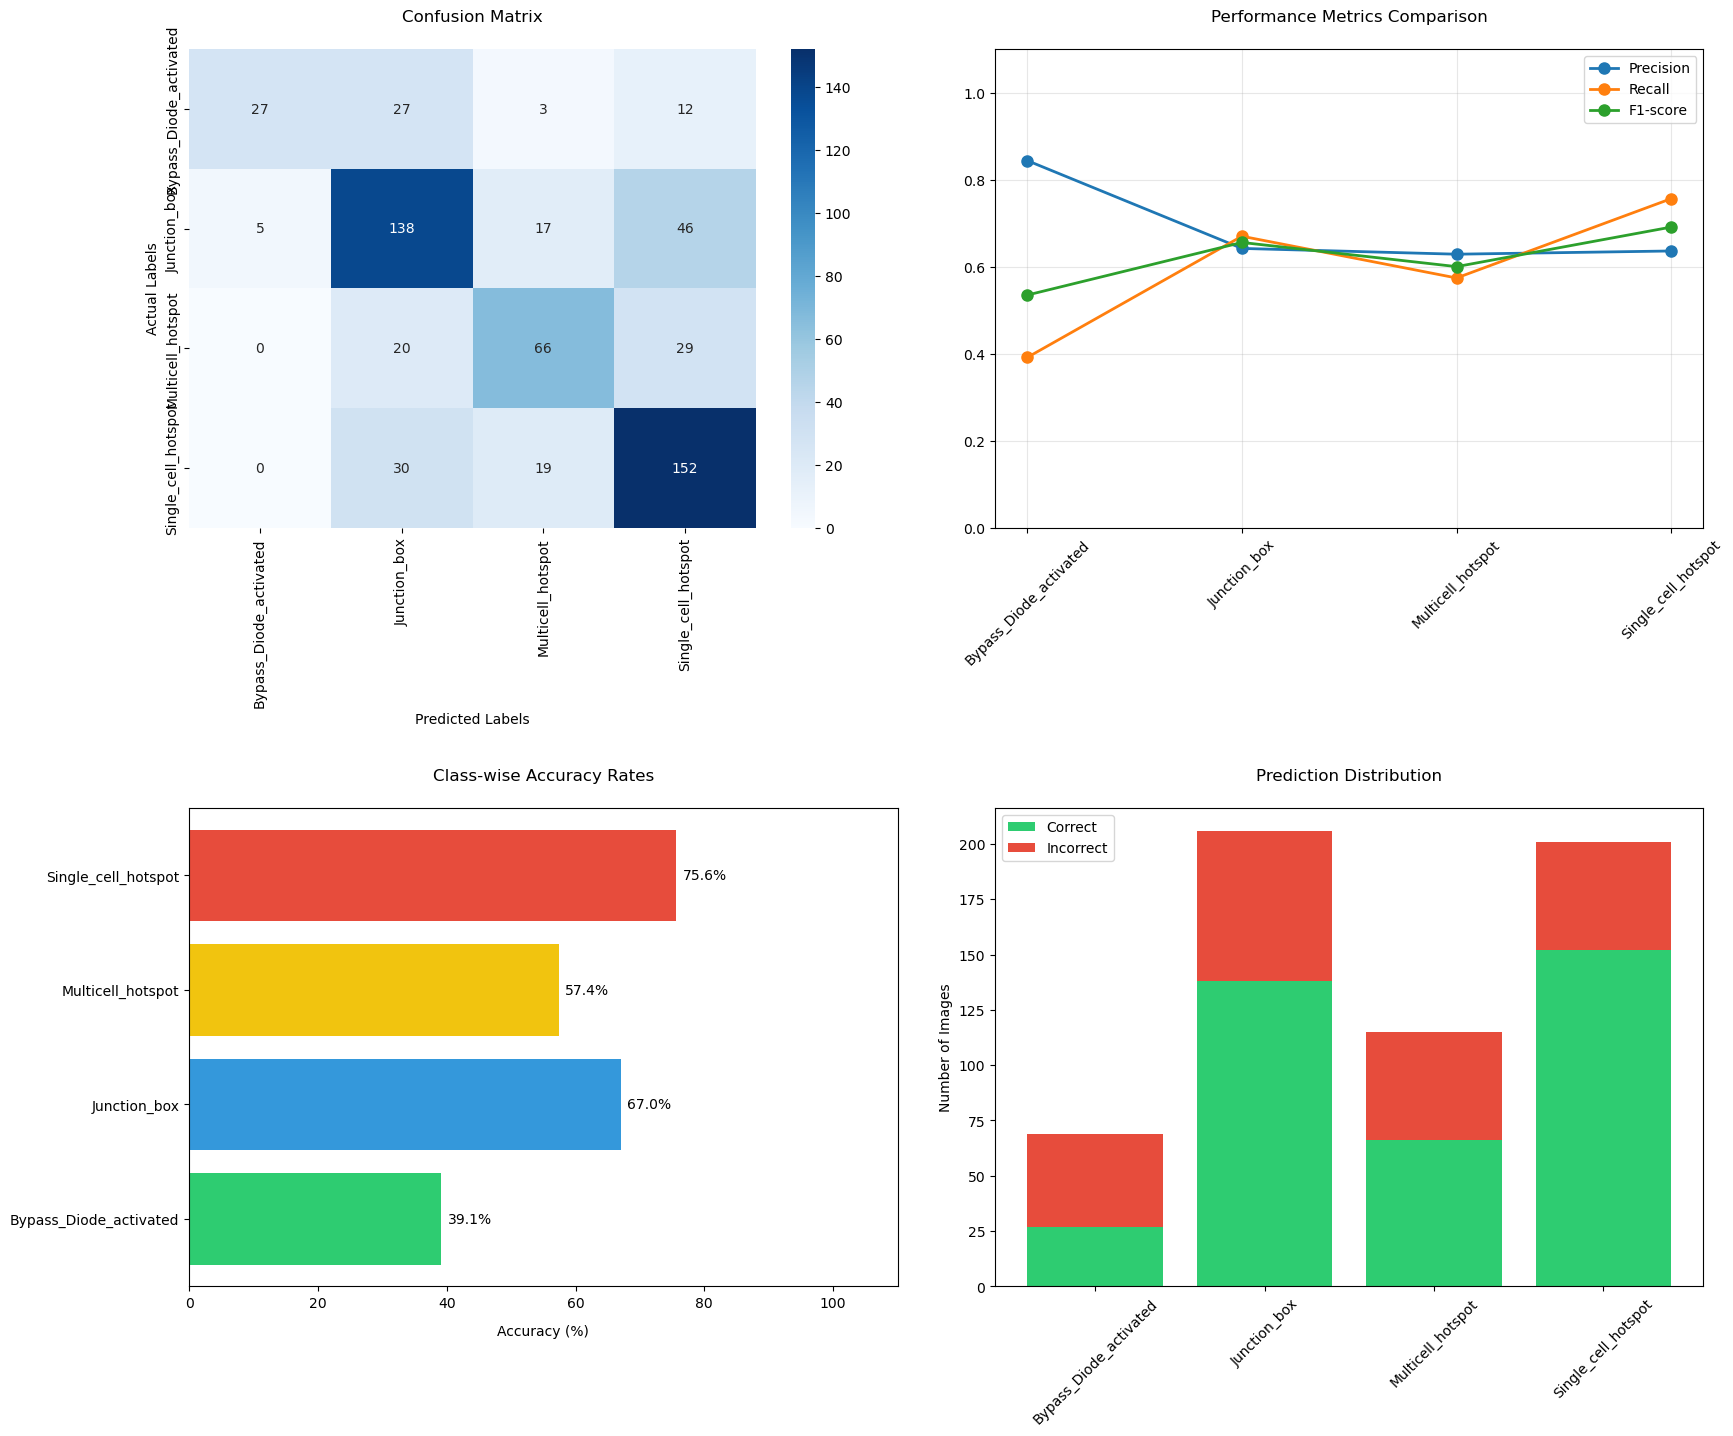

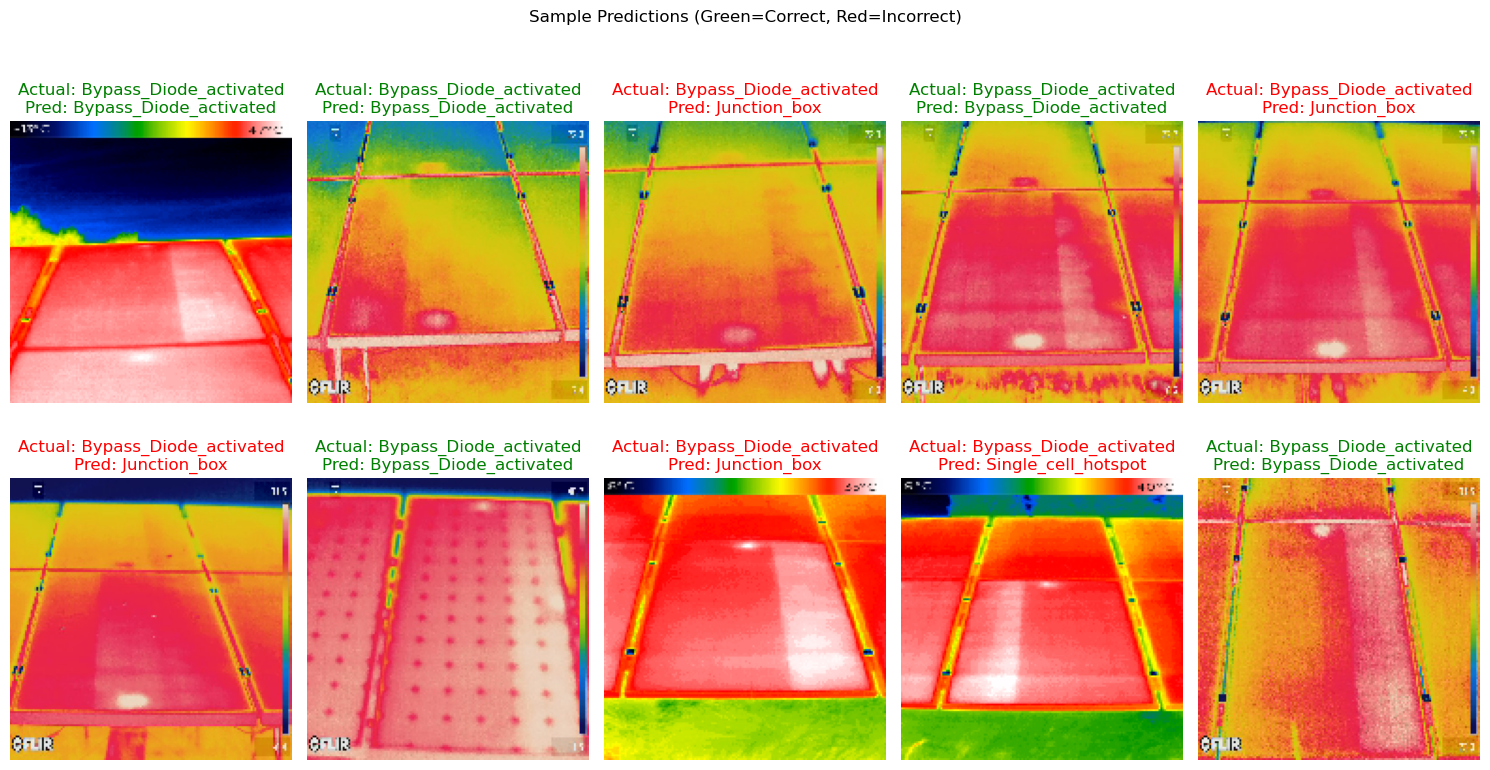

In [2]:
# Load the trained model
model = load_model("solar_fault_classifier.h5")

# Define function to preprocess images
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Define class labels
class_labels = ["Bypass_Diode_activated", "Junction_box", 
               "Multicell_hotspot", "Single_cell_hotspot"]

# Set path to test images directory
test_dir = "images_classed"

# Initialize metrics
correct = 0
incorrect = 0
actual_labels = []
predicted_labels = []
results = []

# Process images and make predictions
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            
            # Preprocess and predict
            img_array = preprocess_image(img_path)
            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions)
            predicted_label = class_labels[predicted_class]
            
            # Store results
            actual_labels.append(class_name)
            predicted_labels.append(predicted_label)
            results.append((img_name, class_name, predicted_label))
            
            # Update counts
            if class_name == predicted_label:
                correct += 1
            else:
                incorrect += 1

# Calculate metrics
accuracy = correct / (correct + incorrect) * 100
report = classification_report(actual_labels, predicted_labels, 
                              target_names=class_labels, output_dict=True)
cm = confusion_matrix(actual_labels, predicted_labels, labels=class_labels)

# Class-wise accuracy calculation
class_counts = {cls: actual_labels.count(cls) for cls in class_labels}
class_correct = {cls: sum(1 for a, p in zip(actual_labels, predicted_labels) 
                        if a == cls and p == cls) for cls in class_labels}
class_accuracy = {cls: f"{(class_correct[cls]/class_counts[cls])*100:.2f}%" 
                 for cls in class_labels}

# Print detailed report
print("================= Comprehensive Report =================")
print(f"Total Images Tested: {correct + incorrect}")
print(f"Overall Accuracy: {accuracy:.2f}%")
print("\nClass-wise Performance:")
print(f"{'Class':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
for cls in class_labels:
    print(f"{cls:<25} {class_accuracy[cls]:<10} "
          f"{report[cls]['precision']*100:.2f}%   "
          f"{report[cls]['recall']*100:.2f}%    "
          f"{report[cls]['f1-score']*100:.2f}%")

# Create visualizations
plt.figure(figsize=(18, 15))

# 1. Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# 2. Metric Comparison
plt.subplot(2, 2, 2)
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.plot(class_labels, [report[cls][metric] for cls in class_labels], 
             marker='o', linewidth=2, markersize=8, label=metric.capitalize())
plt.title('Performance Metrics Comparison', pad=20)
plt.ylim(0, 1.1)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Class Accuracy
plt.subplot(2, 2, 3)
acc_values = [float(class_accuracy[cls].strip('%')) for cls in class_labels]
plt.barh(class_labels, acc_values, color=['#2ecc71', '#3498db', '#f1c40f', '#e74c3c'])
plt.xlabel('Accuracy (%)', labelpad=10)
plt.title('Class-wise Accuracy Rates', pad=20)
plt.xlim(0, 110)
for i, v in enumerate(acc_values):
    plt.text(v + 1, i, f"{v:.1f}%", color='black', va='center')

# 4. Prediction Distribution
plt.subplot(2, 2, 4)
wrong_counts = [class_counts[cls] - class_correct[cls] for cls in class_labels]
plt.bar(class_labels, class_correct.values(), color='#2ecc71', label='Correct')
plt.bar(class_labels, wrong_counts, bottom=class_correct.values(),
        color='#e74c3c', label='Incorrect')
plt.title('Prediction Distribution', pad=20)
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Number of Images')

plt.tight_layout(pad=3.0)
plt.show()

# Sample predictions visualization
plt.figure(figsize=(15, 8))
for i, (img_name, actual, predicted) in enumerate(results[:10]):
    plt.subplot(2, 5, i+1)
    img_path = os.path.join(test_dir, actual, img_name)
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPred: {predicted}", color=color)
plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', y=1.02)
plt.tight_layout()
plt.show()